In [56]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
import math 
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [583]:
dataset = pd.read_csv('/Users/pierohmd/Desktop/reconstruction.csv')
dataset = dataset.drop(columns=['Unnamed: 0'])


In [760]:
data=pd.read_csv('deconv.csv',sep=';')

In [761]:
data=data.rename(columns={'Data':'Day','Godzina':'hour','Minuty':'minute','Wolumen':'Load'})

In [755]:
data = pd.read_csv('data.csv')
data = data.drop(columns=['Unnamed: 0'])

In [756]:
data['Load'] = dataset.R

In [757]:
data.head()

,Day,hour,minute,Load,seconds,weekday
0,2008-01-01,0,15,-2074.271908,900,Tuesday
1,2008-01-01,0,30,-2074.271908,1800,Tuesday
2,2008-01-01,0,45,-1468.293424,2700,Tuesday
3,2008-01-01,1,0,-1468.293424,3600,Tuesday
4,2008-01-01,1,15,-1859.735795,4500,Tuesday


In [663]:
import holidays
from datetime import date
pl_holidays = holidays.PL()
#date(2014, 5, 1) in pl_holidays

In [664]:
import datetime as dt

In [762]:
data.Day = pd.to_datetime(data.Day)

In [763]:
data.Day = pd.to_datetime(data.Day)
data['year'] = data.Day.dt.year
data['month'] = data.Day.dt.month
data['day'] = data.Day.dt.day

In [667]:
data['month'] = data.Day.dt.month

In [668]:
data['day'] = data.Day.dt.day

In [670]:
len(data.Day.drop_duplicates())

3288

In [649]:
data.head()

,Day,hour,minute,Load,seconds,weekday,year,month,day
0,2008-01-01,0,15,-2074.271908,900,Tuesday,2008,1,1
1,2008-01-01,0,30,-2074.271908,1800,Tuesday,2008,1,1
2,2008-01-01,0,45,-1468.293424,2700,Tuesday,2008,1,1
3,2008-01-01,1,0,-1468.293424,3600,Tuesday,2008,1,1
4,2008-01-01,1,15,-1859.735795,4500,Tuesday,2008,1,1


In [68]:
from datetime import date
Days = data.day.tolist()
Months = data.month.tolist()
Years = data.year.tolist()
hd = []
for i in range(len(data)):
    if date(Years[i], Months[i], Days[i]) in pl_holidays : 
            hd.append(1)
    else : 
        hd.append(0)
data['holidays'] = hd

In [69]:
data.head()

,Day,hour,minute,Load,seconds,weekday,year,month,day,holidays
0,2008-01-01,0,15,-2074.271908,900,Tuesday,2008,1,1,1
1,2008-01-01,0,30,-2074.271908,1800,Tuesday,2008,1,1,1
2,2008-01-01,0,45,-1468.293424,2700,Tuesday,2008,1,1,1
3,2008-01-01,1,0,-1468.293424,3600,Tuesday,2008,1,1,1
4,2008-01-01,1,15,-1859.735795,4500,Tuesday,2008,1,1,1


In [70]:
Mon = data[data['weekday'] == 'Monday']
Mon = Mon[Mon['holidays'] == 0]
Mon_Day = Mon.Day.drop_duplicates().tolist()

In [71]:
weekdays = data.weekday.drop_duplicates().tolist()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [72]:
Mean = []
for w in weekdays:
    W = data[data['weekday'] == w]
    W = W[W['holidays'] == 0]
    W_Day = W.Day.drop_duplicates().tolist()
    mean = pd.DataFrame()
    mean = np.zeros(96)
    k = 0
    for d in W_Day:
        value = W[W['Day'] == d].Load
        try :
            mean =  mean + np.asarray(value)
            k = k+1
        except : 
            continue
            
    mean = mean/k
    Mean.append(mean)

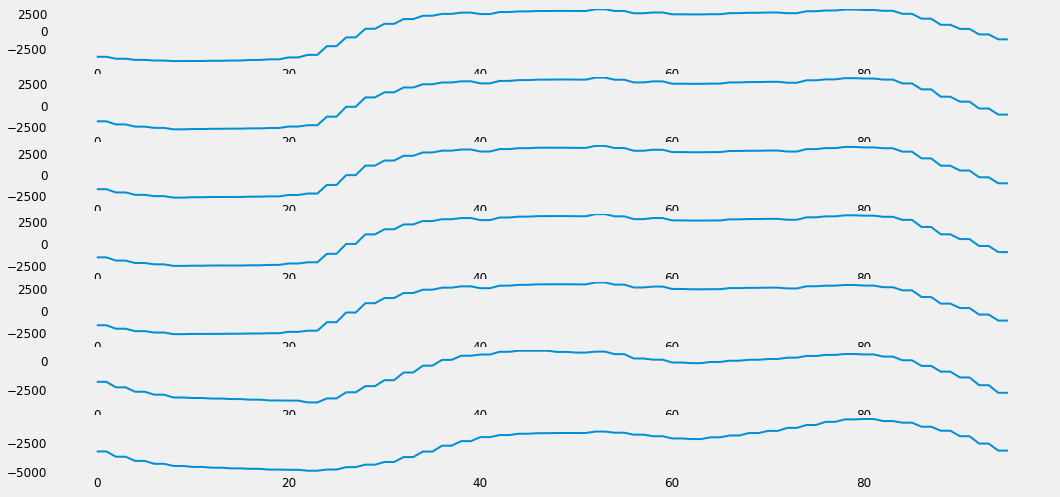

In [196]:
plt.figure(1)
plt.subplot(711)
plt.plot(Mean[0])
plt.subplot(712)
plt.plot(Mean[1])
plt.subplot(713)
plt.plot(Mean[2])
plt.subplot(714)
plt.plot(Mean[3])
plt.subplot(715)
plt.plot(Mean[4])
plt.subplot(716)
plt.plot(Mean[5])
plt.subplot(717)
plt.plot(Mean[6])


In [539]:
sig=sig[0:96]
sig=sig-sig.mean()

In [2195]:
d=data.Day.drop_duplicates()

In [2414]:
def psf_pre(x):
    #x = x - x.mean()
    x=x/x.sum()  
    return x

In [73]:
Ferial = np.array(Mean[0]) + np.array(Mean[1]) + np.array(Mean[2]) + np.array(Mean[3]) + np.array(Mean[4]) 
Ferial=Ferial/5.
Ferial=Ferial/Ferial.sum()

([<matplotlib.lines.Line2D at 0x7fb91af385b0>], 0.010416666666666664)

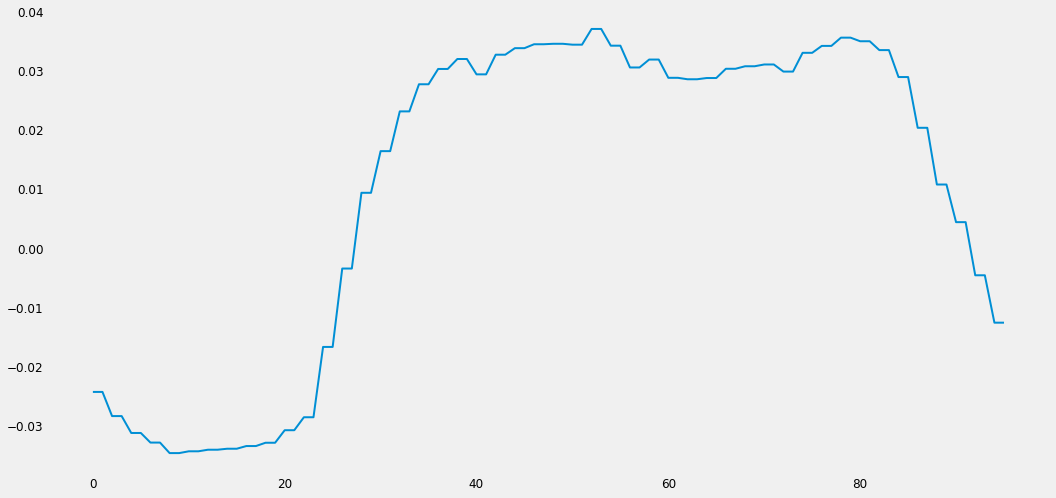

In [137]:
plt.plot(Ferial),Ferial.mean()

In [74]:
we= np.array(Mean[5])+np.array(Mean[6])
we=we/2.
we=we/we.sum()

In [177]:
day=data.Day.drop_duplicates()

In [207]:
len(day)*96,len(data)

(315648, 315648)

In [183]:
data[data.Day==DAY[0]]

,Day,hour,minute,Load,seconds,weekday,year,month,day,holidays,r
0,2008-01-01,0,15,-2074.271908,900,Tuesday,2008,1,1,1,2814.448529
1,2008-01-01,0,30,-2074.271908,1800,Tuesday,2008,1,1,1,0.000000
2,2008-01-01,0,45,-1468.293424,2700,Tuesday,2008,1,1,1,0.000000
3,2008-01-01,1,0,-1468.293424,3600,Tuesday,2008,1,1,1,0.000000
4,2008-01-01,1,15,-1859.735795,4500,Tuesday,2008,1,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
91,2008-01-01,23,0,-998.661472,82800,Tuesday,2008,1,1,1,0.000000
92,2008-01-01,23,15,-1642.488782,83700,Tuesday,2008,1,1,1,0.000000
93,2008-01-01,23,30,-1642.488782,84600,Tuesday,2008,1,1,1,0.000000
94,2008-01-01,23,45,-2304.126377,85500,Tuesday,2008,1,1,1,0.000000


In [672]:
MAX=[]
PROB_D=[]
DAY=np.array(day)
for t in range(len(DAY)-1):
    startdata=data[(data.Day==DAY[t])].index.tolist()[0]
    enddata=data[(data.Day==DAY[t+1])].index.tolist()[0]
    if enddata-startdata!=96:
        PROB_D.append(DAY[t])
        print('dimme de no')
    arr_= np.array(data.Load.loc[startdata:enddata])
    
    #arr_= arr_-arr_.mean()
    MAX.append(arr_.max())
    print(t,len(DAY)-1)

0 3287
1 3287
2 3287
3 3287
4 3287
5 3287
6 3287
7 3287
8 3287
9 3287
10 3287
11 3287
12 3287
13 3287
14 3287
15 3287
16 3287
17 3287
18 3287
19 3287
20 3287
21 3287
22 3287
23 3287
24 3287
25 3287
26 3287
27 3287
28 3287
29 3287
30 3287
31 3287
32 3287
33 3287
34 3287
35 3287
36 3287
37 3287
38 3287
39 3287
40 3287
41 3287
42 3287
43 3287
44 3287
45 3287
46 3287
47 3287
48 3287
49 3287
50 3287
51 3287
52 3287
53 3287
54 3287
55 3287
56 3287
57 3287
58 3287
59 3287
60 3287
61 3287
62 3287
63 3287
64 3287
65 3287
66 3287
67 3287
68 3287
69 3287
70 3287
71 3287
72 3287
73 3287
74 3287
75 3287
76 3287
77 3287
78 3287
79 3287
80 3287
81 3287
82 3287
83 3287
84 3287
85 3287
86 3287
87 3287
88 3287
dimme de no
89 3287
90 3287
91 3287
92 3287
93 3287
94 3287
95 3287
96 3287
97 3287
98 3287
99 3287
100 3287
101 3287
102 3287
103 3287
104 3287
105 3287
106 3287
107 3287
108 3287
109 3287
110 3287
111 3287
112 3287
113 3287
114 3287
115 3287
116 3287
117 3287
118 3287
119 3287
120 3287
121 3287


917 3287
918 3287
919 3287
920 3287
921 3287
922 3287
923 3287
924 3287
925 3287
926 3287
927 3287
928 3287
929 3287
930 3287
931 3287
932 3287
933 3287
934 3287
935 3287
936 3287
937 3287
938 3287
939 3287
940 3287
941 3287
942 3287
943 3287
944 3287
945 3287
946 3287
947 3287
948 3287
949 3287
950 3287
951 3287
952 3287
953 3287
954 3287
955 3287
956 3287
957 3287
958 3287
959 3287
960 3287
961 3287
962 3287
963 3287
964 3287
965 3287
966 3287
967 3287
968 3287
969 3287
970 3287
971 3287
972 3287
973 3287
974 3287
975 3287
976 3287
977 3287
978 3287
979 3287
980 3287
981 3287
982 3287
983 3287
984 3287
985 3287
986 3287
987 3287
988 3287
989 3287
990 3287
991 3287
992 3287
993 3287
994 3287
995 3287
996 3287
997 3287
998 3287
999 3287
1000 3287
1001 3287
1002 3287
1003 3287
1004 3287
1005 3287
1006 3287
1007 3287
1008 3287
1009 3287
1010 3287
1011 3287
1012 3287
1013 3287
1014 3287
1015 3287
1016 3287
1017 3287
1018 3287
1019 3287
1020 3287
1021 3287
1022 3287
1023 3287
1024 3287
102

1742 3287
1743 3287
1744 3287
1745 3287
1746 3287
1747 3287
1748 3287
1749 3287
1750 3287
1751 3287
1752 3287
1753 3287
1754 3287
1755 3287
1756 3287
1757 3287
1758 3287
1759 3287
1760 3287
1761 3287
dimme de no
1762 3287
1763 3287
1764 3287
1765 3287
1766 3287
1767 3287
1768 3287
1769 3287
1770 3287
1771 3287
1772 3287
1773 3287
1774 3287
1775 3287
1776 3287
1777 3287
1778 3287
1779 3287
1780 3287
1781 3287
1782 3287
1783 3287
1784 3287
1785 3287
1786 3287
1787 3287
1788 3287
1789 3287
1790 3287
1791 3287
1792 3287
1793 3287
1794 3287
1795 3287
1796 3287
1797 3287
1798 3287
1799 3287
1800 3287
1801 3287
1802 3287
1803 3287
1804 3287
1805 3287
1806 3287
1807 3287
1808 3287
1809 3287
1810 3287
1811 3287
1812 3287
1813 3287
1814 3287
1815 3287
1816 3287
1817 3287
1818 3287
1819 3287
1820 3287
1821 3287
1822 3287
1823 3287
1824 3287
1825 3287
1826 3287
1827 3287
1828 3287
1829 3287
1830 3287
1831 3287
1832 3287
1833 3287
1834 3287
1835 3287
1836 3287
1837 3287
1838 3287
1839 3287
1840 328

2568 3287
2569 3287
2570 3287
2571 3287
2572 3287
2573 3287
2574 3287
2575 3287
2576 3287
2577 3287
2578 3287
2579 3287
2580 3287
2581 3287
2582 3287
2583 3287
2584 3287
2585 3287
2586 3287
2587 3287
2588 3287
2589 3287
2590 3287
2591 3287
2592 3287
2593 3287
2594 3287
2595 3287
2596 3287
2597 3287
2598 3287
2599 3287
2600 3287
2601 3287
2602 3287
2603 3287
2604 3287
2605 3287
2606 3287
2607 3287
2608 3287
2609 3287
2610 3287
2611 3287
2612 3287
2613 3287
2614 3287
2615 3287
2616 3287
2617 3287
2618 3287
2619 3287
2620 3287
2621 3287
2622 3287
2623 3287
2624 3287
2625 3287
2626 3287
2627 3287
2628 3287
2629 3287
2630 3287
2631 3287
2632 3287
2633 3287
2634 3287
2635 3287
2636 3287
2637 3287
2638 3287
2639 3287
2640 3287
2641 3287
2642 3287
2643 3287
dimme de no
2644 3287
2645 3287
2646 3287
2647 3287
2648 3287
2649 3287
2650 3287
2651 3287
2652 3287
2653 3287
2654 3287
2655 3287
2656 3287
2657 3287
2658 3287
2659 3287
2660 3287
2661 3287
2662 3287
2663 3287
2664 3287
2665 3287
2666 328

In [673]:
OLD_PROB_D=PROB_D.copy()

In [674]:
fix_data=data.copy()
I=np.arange(0,len(OLD_PROB_D)+1,1)
for i in range(len(I)-1):
    if i%2==0:
        to_add=fix_data.loc[fix_data[(fix_data.Day==OLD_PROB_D[I[i+1]]) & (fix_data.hour==2)].index.tolist()[0:4]].Load
        line = fix_data.loc[to_add.index[0]:to_add.index[0]+3]
        start=fix_data[(fix_data.Day==OLD_PROB_D[I[i]]) & (fix_data.hour==1)].index.max()+1
        try_data=fix_data.copy()
        try_data=try_data.drop(np.arange(start,len(data)))
        fix_data=try_data.append(line,ignore_index=True)
        fix_data.loc[len(fix_data)-4:len(fix_data)].Day=np.repeat(OLD_PROB_D[I[i]],4)
        fix_data=fix_data.append(data.loc[fix_data.index.max()-3:len(data)])
        fix_data=fix_data.drop(line.index)

/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [653]:
data=fix_data

In [654]:
#data=fix_data
data['year'] = data.Day.dt.year
data['month'] = data.Day.dt.month
data['day'] = data.Day.dt.day

In [655]:
data.Day.drop_duplicates()

0        2008-01-01
96       2008-01-02
192      2008-01-03
288      2008-01-04
384      2008-01-05
            ...    
315168   2016-12-27
315264   2016-12-28
315360   2016-12-29
315456   2016-12-30
315552   2016-12-31
Name: Day, Length: 3288, dtype: datetime64[ns]

In [678]:
fix_data.Day.drop_duplicates().tolist()==data.Day.drop_duplicates().tolist()

True

In [688]:
len(data.Day.drop_duplicates().tolist())*96

315648

In [736]:
fix_data[fix_data.Day==DAY[0]].Load.max()

1242.5823040480009

In [732]:
fix_data[fix_data.Day==DAY[0]].Load.max()

1242.5823040480009

In [741]:
arr_(0)

TypeError: 'numpy.ndarray' object is not callable

In [793]:
fix_data

,Day,hour,minute,Load,seconds,weekday,year,month,day,r
0,2008-01-01,0,15,-2074.271908,900,Tuesday,2008,1,1,1208.727004
1,2008-01-01,0,30,-2074.271908,1800,Tuesday,2008,1,1,0.000000
2,2008-01-01,0,45,-1468.293424,2700,Tuesday,2008,1,1,0.000000
3,2008-01-01,1,0,-1468.293424,3600,Tuesday,2008,1,1,0.000000
4,2008-01-01,1,15,-1859.735795,4500,Tuesday,2008,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...
315643,2016-12-31,23,0,-2650.692665,284079600,Saturday,2016,12,31,0.000000
315644,2016-12-31,23,15,-2904.187251,284080500,Saturday,2016,12,31,0.000000
315645,2016-12-31,23,30,-2904.187251,284081400,Saturday,2016,12,31,0.000000
315646,2016-12-31,23,45,-4341.151518,284082300,Saturday,2016,12,31,0.000000


In [804]:
len(MAX)*96,len(data)

(315552, 315648)

In [813]:
fix_data.loc[0:95]

,Day,hour,minute,Load,seconds,weekday,year,month,day,r
0,2008-01-01,0,15,-2074.271908,900,Tuesday,2008,1,1,1208.727004
1,2008-01-01,0,30,-2074.271908,1800,Tuesday,2008,1,1,0.000000
2,2008-01-01,0,45,-1468.293424,2700,Tuesday,2008,1,1,0.000000
3,2008-01-01,1,0,-1468.293424,3600,Tuesday,2008,1,1,0.000000
4,2008-01-01,1,15,-1859.735795,4500,Tuesday,2008,1,1,0.000000
5,2008-01-01,1,30,-1859.735795,5400,Tuesday,2008,1,1,0.000000
6,2008-01-01,1,45,-2214.162659,6300,Tuesday,2008,1,1,0.000000
7,2008-01-01,2,0,-2214.162659,7200,Tuesday,2008,1,1,0.000000
8,2008-01-01,2,15,-2668.066834,8100,Tuesday,2008,1,1,0.000000
9,2008-01-01,2,30,-2668.066834,9000,Tuesday,2008,1,1,0.000000


In [1173]:
MAX=[]
PROB_D=[]
#data=data.reset_index()
RANGE=np.arange(0,len(fix_data),96)
for t in RANGE:
    MAX.append(fix_data.loc[t:t+96-1].Load.max())

In [924]:
MAX[1]

9898.577747521258

In [925]:
def build_day(k):
    day=np.zeros(96)
    day[0]=k
    return day

In [1177]:
DELTA=[]
for m in MAX:
    DELTA.append(build_day(m))
#DELTA=np.abs(DELTA)

In [1178]:
DELTA=np.array(DELTA).ravel()

In [928]:
from scipy import signal
CONV=signal.convolve(DELTA,Ferial)
factor=(fix_data.Load.max())/CONV.max()


In [972]:
def isweekend(day):
    if day=='Saturday' or day=='Sunday':
        return 'Yes'

In [930]:
#factor=data.Load.max()/CONV.max()


In [973]:
new_conv=signal.convolve(DELTA*factor,Ferial)

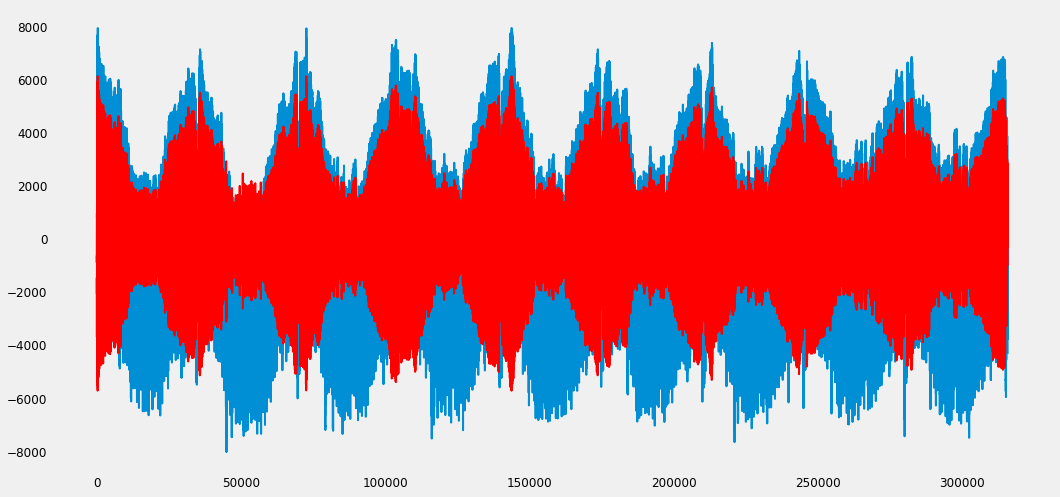

In [974]:
plt.plot(fix_data.Load)
plt.plot(new_conv,color='red')

In [934]:
data['r']=DELTA

In [935]:
fix_data[fix_data['Day']=='2016-01-01'].index.tolist()[0]

280512

In [1179]:
fix_data['r']=DELTA

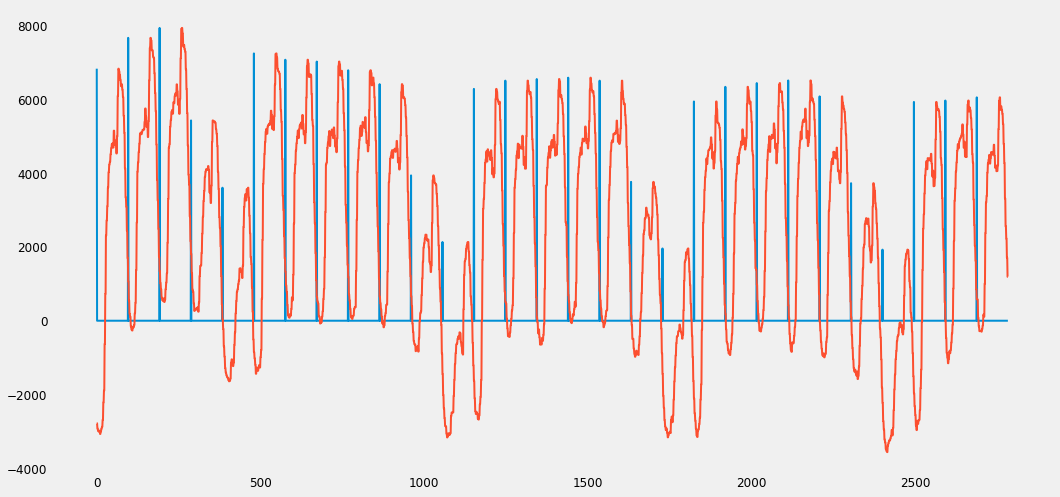

In [1180]:
plt.plot(np.array(fix_data.r[96:96*30]))
plt.plot(np.array(fix_data.Load[96:96*30]))

In [1181]:
data=fix_data

In [1182]:
YEARS=data.year.drop_duplicates().tolist()

In [1183]:
TOT=[]
for m in range(1,13):
    DAYS=[]
    for d in weekdays:
        mon=data[data['weekday']==d]
        W=[]
        J=np.arange(0,96*7,96)
        K=[]
        for j in range(len(J)):
            j_rel=np.zeros(96)
            k=0
            for y in range(len(YEARS)-1):
                try:
                    add=np.array(mon[(mon['month']==m)&(mon.year==YEARS[y])].reset_index().loc[J[j]:J[j]+95].r)
                    j_rel=j_rel+add
                    k=k+1
                except:
                    continue
            K.append(k)
            W.append(j_rel/k)
        DAYS.append(W)
    print (m,13)
    TOT.append(DAYS)

<ipython-input-1183-9e8176f5d11d>:20: RuntimeWarning: invalid value encountered in true_divide
  W.append(j_rel/k)


1 13
2 13
3 13
4 13
5 13
6 13
7 13
8 13
9 13
10 13
11 13
12 13


In [941]:
#Serve
cal=pd.DataFrame({'Day':data['Day'],'month':data['month'],'year':data['year'],'Weekday':data['weekday']})
cal['hour']=data.hour
cal['minute']=data.minute
cal=cal[cal['year']==2016]

In [942]:
#Serve
NEW_Z=[]
for k in range(1,13):
    mese=cal[cal['month']==k]
    mese=mese.reset_index().drop(columns=['index'])
    z=[]
    for j in range(1,6):
        sett=mese.loc[(j-1)*7*96:96*(j)*7]
        #print(j-1)
        ZERO=np.zeros(len(sett)-1)+j-1
        z.append(ZERO)
    new_z=[]
    for i in z:
        for j in i:
            new_z.append(j)
    new_z=new_z[0:len(mese)]+[new_z[len(new_z)-1]]
    NEW_Z.append(new_z)
    

In [943]:
#Serve
ZERO_FIN=[]
for i in NEW_Z:
    for j in i:
        ZERO_FIN.append(j)

In [944]:
cal['n']=ZERO_FIN

In [945]:
tot_cal=cal.drop(columns=['hour','minute'])
tot_cal=tot_cal.drop_duplicates(subset='Day')

In [946]:
tot_cal=tot_cal.reset_index()

In [947]:
def week_to_number(day):
    if day=='Monday':
        i=0
    if day=='Tuesday':
        i=1
    if day=='Wednesday':
        i=2
    if day=='Thursday':
        i=3
    if day=='Friday':
        i=4
    if day=='Saturday':
        i=5
    if day=='Sunday':
        i=6
    return i

In [948]:
d_n=[]
for day in tot_cal.Weekday.tolist():
    d_n.append(week_to_number(day))

In [949]:
tot_cal['d_n']=d_n

In [1184]:
SIGNAL=np.array([])
for m in range(1,13):
    mon=tot_cal[tot_cal['month']==m]
    mon=mon.reset_index()
    
    for i in range(len(mon)):
            dn=int(mon.loc[i]['d_n'])
            N=int(mon.loc[i]['n'])
            SIGNAL=np.append(SIGNAL,TOT[m-1][dn][N])


In [1185]:
bis_1=data[data.year==2008]
bis_2=data[data.year==2012]
first=np.array(bis_1[bis_1['Day']=='2008-02-29'].r)
second=np.array(bis_2[bis_2['Day']=='2012-02-29'].r)
bis=(first+second)/2.

In [1186]:
a=np.argwhere(np.isnan(SIGNAL)).ravel().min()
b=np.argwhere(np.isnan(SIGNAL)).ravel().max()+1
SIGNAL[a:b]=bis

In [1187]:
LIST=[4552.440622,3885.058638,2607.848534,2314.120664,1243.705736,4309.409862,5901.746180,4335.648465]
LIST=np.array(LIST).mean()

In [1188]:
OLD_SIGNAL=SIGNAL.copy()


In [1189]:
#SIGNAL=np.abs(OLD_SIGNAL)*(data.Load.max()-data.Load.min())/OLD_SIGNAL.max()
SIGNAL=np.abs(OLD_SIGNAL)

In [1190]:
Ferial = np.array(Mean[0]) + np.array(Mean[1]) + np.array(Mean[2]) + np.array(Mean[3]) + np.array(Mean[4]) 
Ferial=Ferial/5.
Ferial=Ferial/Ferial.sum()
Old_Ferial=Ferial.copy()

In [1191]:
Ferial = np.array(Mean[0]) + np.array(Mean[1]) + np.array(Mean[2]) + np.array(Mean[3]) + np.array(Mean[4]) 
Ferial=Ferial/5.
Ferial=Ferial/Ferial.sum()
Ferial=Ferial+Ferial.mean()-Ferial.min()-Ferial.max()

In [1117]:
Ferial=Ferial/5.

In [1118]:
Ferial=Ferial/Ferial.sum()

In [1119]:
Ferial=Ferial+Ferial.mean()-Ferial.min()-Ferial.max()

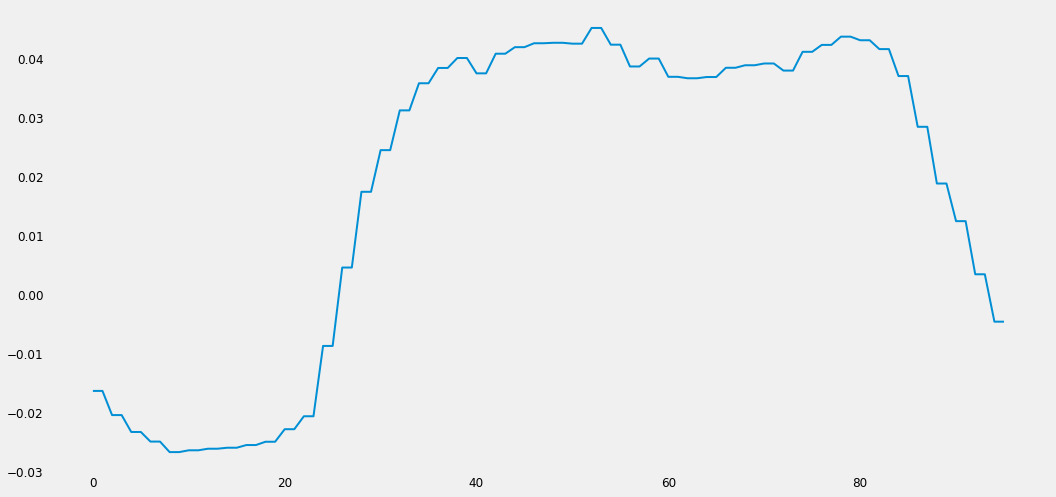

In [1120]:
plt.plot(Ferial)

In [1195]:
X=signal.convolve(SIGNAL,Ferial)
X=X*(data.Load.max())/X.max()

In [1122]:
X=X*data.Load.min()/X.min()

In [1123]:
data.Load.min()/X.min()

1.0

In [1193]:
test=np.array(data[data.year==2016].Load)

In [1129]:
X=X[0:len(X)-95]

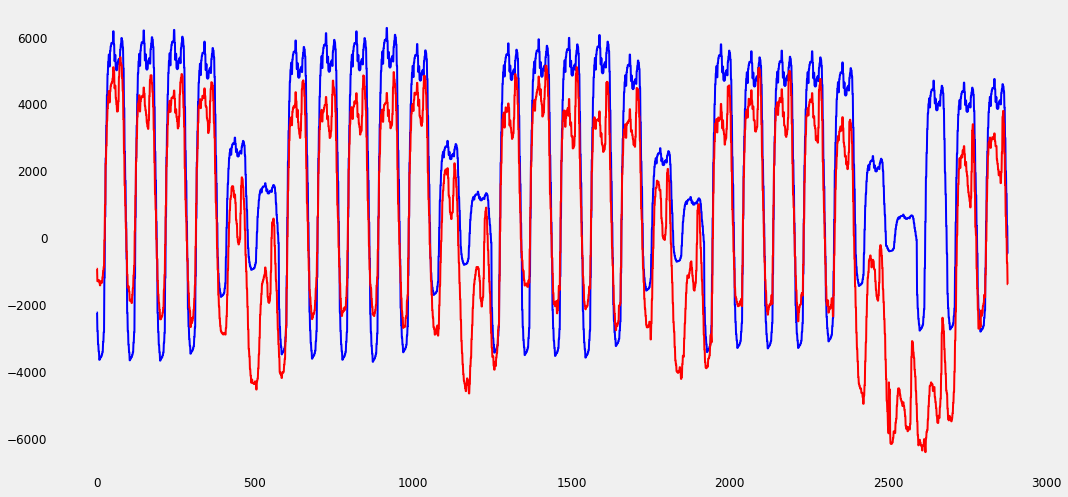

In [1196]:
plt.plot(X[60*96:90*96],color='blue')
plt.plot(np.array(test)[60*96:90*96],color='red')
#error=np.array(test)[12*96:50*96]-original
#plt.plot(np.abs(error),color='black')

In [959]:
start=20*96
end=(20+7*40)*96
prev=X[start:end]
t=np.arange(0,len(prev),1)

In [960]:
new_pred=X

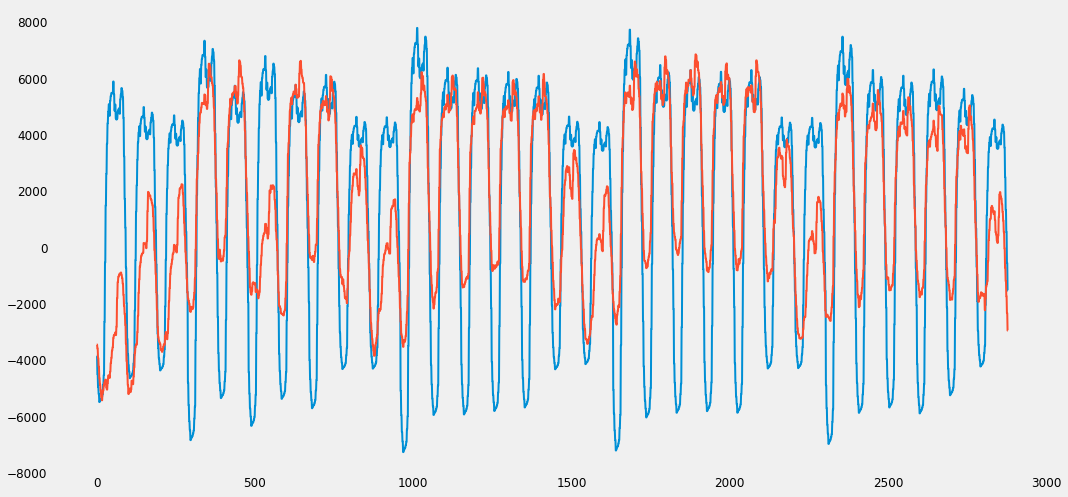

In [961]:
plt.plot(new_pred[0:30*96])
plt.plot(test[0:30*96])

In [962]:
e=0
for er in ERROR:
    e=e+er

NameError: name 'ERROR' is not defined

In [963]:
mean_e=e/len(ERROR)

NameError: name 'ERROR' is not defined

In [964]:
test=np.array(data[data.year==2016].reset_index().loc[start:end-1].Load)

In [965]:
new_pred=X

In [966]:
recon_pred=new_pred[0:len(mean_e)]+0.8*mean_e

NameError: name 'mean_e' is not defined

In [967]:
plt.plot(recon_pred[20*96:34*96],color='blue')
plt.plot(test[20*96:34*96],color='red')

NameError: name 'recon_pred' is not defined

In [1144]:
#Ferial = np.array(Mean[0]) + np.array(Mean[1]) + np.array(Mean[2]) + np.array(Mean[3]) + np.array(Mean[4]) 
#Ferial=Ferial/5.
#Ferial=Ferial/Ferial.sum()
#Ferial=Ferial+Ferial.mean()-Ferial.min()-Ferial.max()
sat= np.array(Mean[6])
sat=sat-sat.min()
sat=sat/sat.sum()
sat=sat-sat.mean()

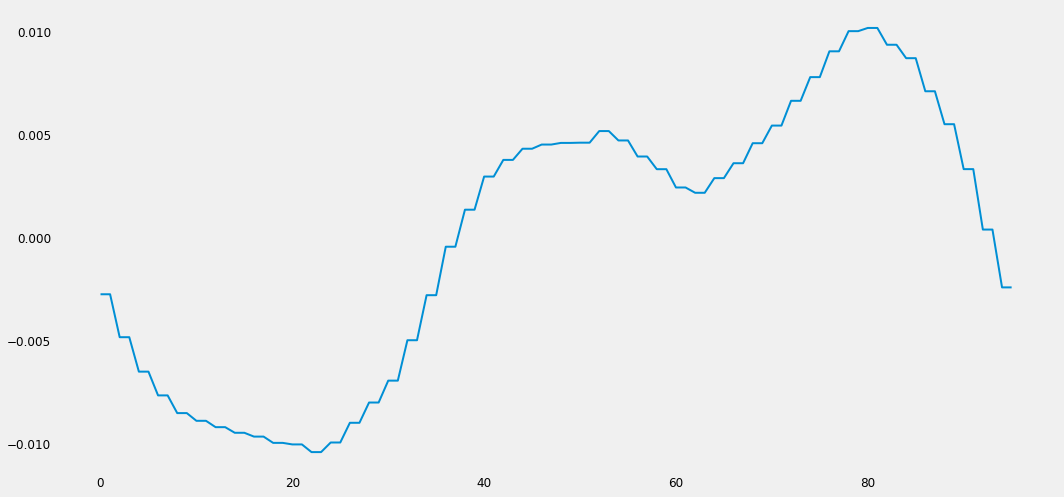

In [1197]:
sun= np.array(Mean[6])
sun=sun-sun.min()
sun=sun/sun.sum()
sun=sun-sun.mean()
sat= np.array(Mean[5])
sat=sat-sat.min()
sat=sat/sat.sum()
sat=sat-sat.mean()
plt.plot(sun)

In [1198]:
SUN=signal.convolve(sun,SIGNAL)
SUN=SUN*data[data.year!=2016].Load.max()/SUN.max()
SAT=signal.convolve(sat,SIGNAL)
SAT=SAT*data[data.year!=2016].Load.max()/SAT.max()

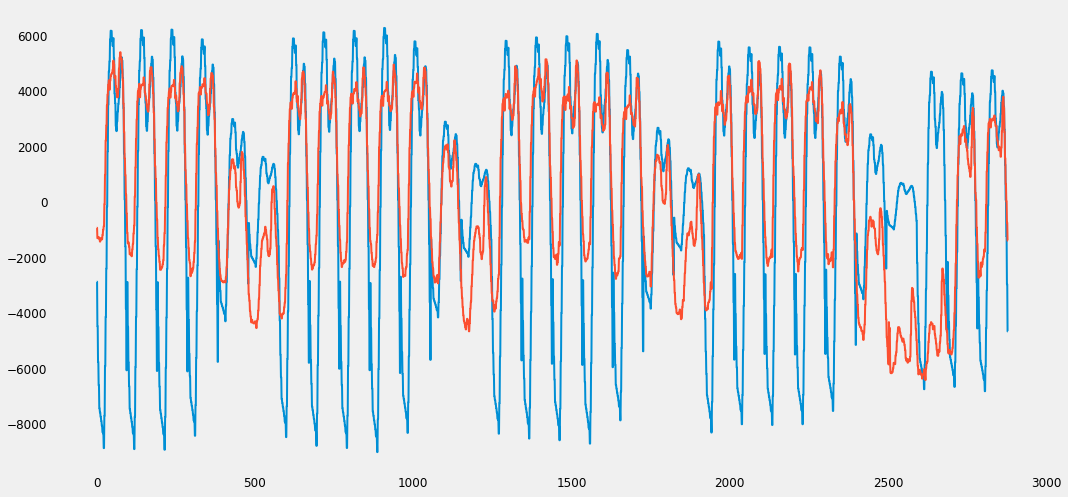

In [1209]:
plt.plot(SAT[60*96:90*96])
plt.plot(test[60*96:90*96])

In [1200]:
recons_data=data[data['year']==2016].copy()
recons_data['PSFFerial']=X[0:len(recons_data)]
recons_data['PSFSunday']=SUN[0:len(recons_data)]
recons_data['PSFSaturday']=SAT[0:len(recons_data)]

In [1201]:
recons_data

,Day,hour,minute,Load,seconds,weekday,year,month,day,r,PSFFerial,PSFSunday,PSFSaturday
280512,2016-01-01,0,15,-3455.062485,252461700,Friday,2016,1,1,-899.33257,-1670.403464,-1245.816774,-2144.956980
280513,2016-01-01,0,30,-3455.062485,252462600,Friday,2016,1,1,0.00000,-1670.403464,-1245.816774,-2144.956980
280514,2016-01-01,0,45,-3596.348902,252463500,Friday,2016,1,1,0.00000,-2088.314188,-2189.782059,-3344.836643
280515,2016-01-01,1,0,-3596.348902,252464400,Friday,2016,1,1,0.00000,-2088.314188,-2189.782059,-3344.836643
280516,2016-01-01,1,15,-3937.495245,252465300,Friday,2016,1,1,0.00000,-2380.588172,-2946.752179,-4301.660577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315643,2016-12-31,23,0,-2650.692665,284079600,Saturday,2016,12,31,0.00000,746.055007,886.515953,-702.820481
315644,2016-12-31,23,15,-2904.187251,284080500,Saturday,2016,12,31,0.00000,204.654150,103.950051,-1695.679448
315645,2016-12-31,23,30,-2904.187251,284081400,Saturday,2016,12,31,0.00000,204.654150,103.950051,-1695.679448
315646,2016-12-31,23,45,-4341.151518,284082300,Saturday,2016,12,31,0.00000,-278.282422,-644.874614,-2667.363559


In [1202]:
psf_data=pd.DataFrame()
psf_data['weekday']=recons_data['weekday']
psf_data['Ferial']=recons_data.PSFFerial
psf_data['Sunday']=recons_data.PSFSunday
psf_data['Saturday']=recons_data.PSFSaturday
psf_data=psf_data.reset_index()

In [1203]:
def psf_choose(day): 
    if day=='Saturday':
        ans=''

In [1204]:
final_recons=np.array(psf_data.Ferial)
for i in range(35136):
    day_data=str(psf_data.loc[i].weekday)
    if day_data=='Sunday':
        final_recons[i]=psf_data.loc[i].Sunday
    if day_data=='Saturday':
        final_recons[i]=psf_data.loc[i].Saturday
        

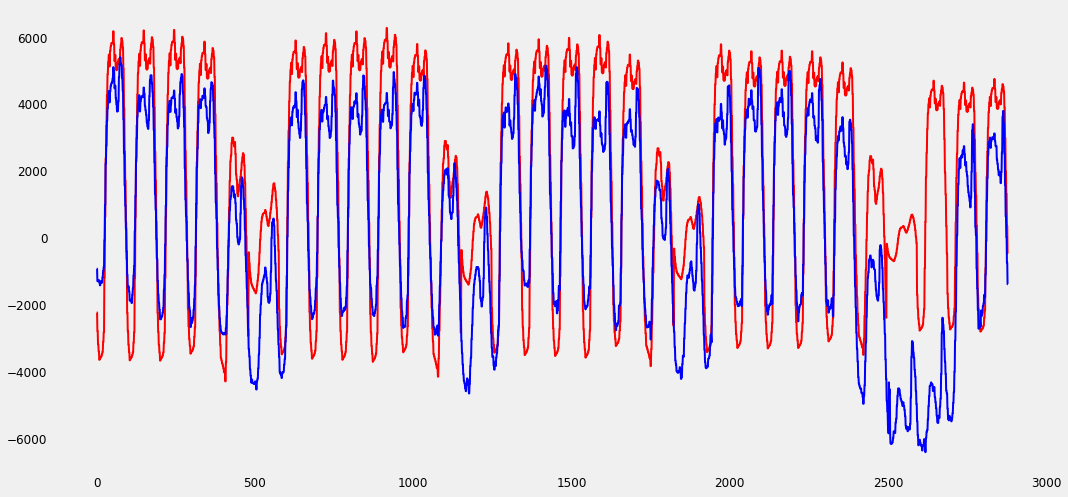

In [1207]:
plt.plot(final_recons[60*96:90*96],color='red')
plt.plot(test[60*96:90*96],color='blue')

In [1152]:
finaldata=data[data['year']==2016].copy()
#finaldata['Prediction']=final_recons

In [1153]:
finaldata.to_csv('pred.csv')

In [1154]:
finaldata=pd.read_csv('pred.csv')

In [53]:
adj_pred=np.array(finaldata['Adjusted Prediction'])

In [1157]:
final_recons

array([-1670.40346393, -1670.40346393, -2088.31418846, ...,
       -1695.67944809, -2667.36355939, -2667.36355939])

In [1155]:
finalrecons=np.array(finaldata['Prediction'])

KeyError: 'Prediction'

In [1158]:
test=np.array(finaldata.Load)
pred=np.array(final_recons)

(1920.0, 5760.0)

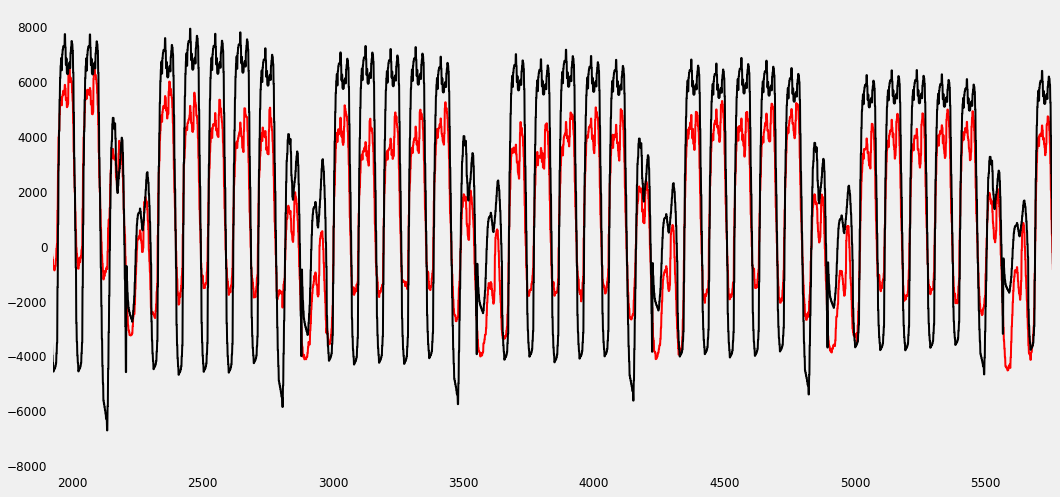

In [1162]:
plt.plot(test,color='red')
plt.plot(pred,color='black')
#plt.plot(adj_pred,color='green')
plt.xlim(20*96,60*96)

In [29]:
from sklearn.metrics import mean_squared_error as mse

In [41]:
PERF=[np.corrcoef(test-pred,test)[0][1], np.sqrt(mse(pred[0*96:30*96],test[0*96:30*96])),np.sqrt(mse(pred[30*96::],test[30*96::]))/test[30*96::].max()]

In [45]:
print ('The correlation between the error and the original signal is '+str(PERF[0]))
print ('The RMSE for the first month of data is ' + str(PERF[1]))
print ('This RMSE is the '+str(PERF[2]*100) +'% of the maximum')

The correlation between the error and the original signal is 0.5527210360455695
The RMSE for the first month of data is 2150.0065611297596
This RMSE is the 31.388460685294987% of the maximum


In [4157]:
ADJ=np.arange(0.1,5.1,0.1)
RMSE_ADJ=[]
for a in ADJ:  
    adj_recon=final_recons+a*mean_e
    rmse_adj=np.sqrt(mean_squared_error(adj_recon,np.array(data[data['year']==2016].Load)))
    RMSE_ADJ.append(rmse_adj)

In [4165]:
ADJ=np.arange(0.55,0.65,0.01)
RMSE_ADJ=[]
for a in ADJ:  
    adj_recon=final_recons+a*mean_e
    rmse_adj=np.sqrt(mean_squared_error(adj_recon,np.array(data[data['year']==2016].Load)))
    RMSE_ADJ.append(rmse_adj)

In [4066]:
start=data[(data['year']==2008) & (data['Day']=='2008/02/29')].index.min()
end=data[(data['year']==2008) & (data['Day']=='2008/02/29')].index.max()
#end-start

95

In [4133]:
ERROR=[]
for Y in [2008,2012]:
        test=np.array(data[data.year==Y].Load)
        error=test-final_recons[0:len(test)]
        ERROR.append(error)
e=0
for er in ERROR:
    e=e+er
mean_e=e/2

In [4154]:
final_recons=np.array(finaldata['Prediction'])

In [4159]:
RMSE=np.array(RMSE_ADJ)

In [4168]:
finaldata['Adjusted Prediction']=final_recons+ADJ[RMSE.argmin()]*mean_e

In [4170]:
finaldata.to_csv('pred.csv')

In [4094]:
test=np.array(data[data.year==2016].Load)